## Toxic: PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [2]:
df = pd.read_pickle('../data/toxictrain.pkl')
print(df.shape)
df.head()

(159571, 24)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,category,rating,...,sent_token,polarity_sentence,polarity_comment,polarity_comment_s,word_count,char_count,char_count_s,polarity_min,polarity_max,polarity_mean
idx,,,,,,,,,,,,,,,,,,,,,
3a4c7758fad18de3,3a4c7758fad18de3,", I hope your retarded kids get anal raped and...",1,1,1,1,1,1,ToSTObThInIH,6,...,"[, I hope your retarded kids get anal raped an...","(-0.6, 1.0, -0.018750000000000003, [-0.4, -0.4...",0.00,0.00,94,494,494,-0.6000,1.0000,-0.018750
24d2b50726b67167,24d2b50726b67167,I am going to murder ZimZalaBim ST47 for being...,1,1,1,1,1,1,ToSTObThInIH,6,...,[I am going to murder ZimZalaBim ST47 for bein...,"(-1.0, -1.0, -1.0, [-1.0])",0.00,0.00,12,68,68,-1.0000,-1.0000,-1.000000
c586b7a2fd575b13,c586b7a2fd575b13,"Shut up you asswipe, we don't care. I'll decap...",1,1,1,1,1,1,ToSTObThInIH,6,...,"[Shut up you asswipe, we don't care., I'll dec...","(-0.2, 0.0, -0.07555555555555557, [0.0, -0.177...",-0.25,-0.25,24,3890,1000,-0.2000,0.0000,-0.075556
77d84b1321c22d9a,77d84b1321c22d9a,"LGBT \n\nyou little fuck , are you a fag , tha...",1,1,1,1,1,1,ToSTObThInIH,6,...,"[LGBT \n\nyou little fuck , are you a fag , th...","(-0.17750000000000005, 0.0, -0.088750000000000...",0.00,0.00,56,280,280,-0.1775,0.0000,-0.088750
1368c10281978876,1368c10281978876,"You're a stupid cunt \n\nFuck you dumb arse, y...",1,1,1,1,1,1,ToSTObThInIH,6,...,"[You're a stupid cunt \n\nFuck you dumb arse, ...","(-0.41250000000000003, -0.41250000000000003, -...",0.00,0.00,59,278,278,-0.4125,-0.4125,-0.412500


In [3]:
class DenseTransformer(TransformerMixin):
    
    def transform(self,X,y=None,**fit_params):
        return X.todense()
    
    def fit_transform(self,X,y=None,**fit_params):
        self.fit(X,y,**fit_params)
        return self.transform(X)
    
    def fit(self,X,y=None, **fit_params):
        return self

In [4]:
 pipe = Pipeline([('vect', CountVectorizer(stop_words='english')),
                      ('to_dense', DenseTransformer()),
                      ('pca', PCA(n_components=2))])

In [5]:
from sklearn.decomposition import TruncatedSVD

data = df.comment_text_s
count_vectorizer = CountVectorizer(ngram_range=(1, 3),  stop_words='english', max_df=0.02, token_pattern="\\b[a-z][a-z]+\\b")
count_vectorizer.fit(data)
counts = count_vectorizer.transform(data).transpose()

In [6]:
clf = TruncatedSVD(n_components=15)
Xpca = clf.fit_transform(counts)

In [7]:
Xpca

array([[ 2.69288192e-05,  1.23409151e-05,  2.07828049e-03, ...,
        -1.30510563e-03,  1.46589364e-02,  1.01222642e-03],
       [-2.12416334e-08,  3.62431276e-07,  2.53448771e-05, ...,
        -2.04678992e-04,  2.98010224e-03,  6.06409456e-06],
       [-1.06164823e-08,  1.81207873e-07,  1.26724820e-05, ...,
        -1.02339492e-04,  1.49005112e-03,  3.03204661e-06],
       ...,
       [ 7.78708532e-08,  1.66721663e-07,  9.84207170e-06, ...,
         2.72160924e-05,  5.35335388e-05, -1.26279434e-05],
       [ 1.55741706e-08,  3.33443327e-08,  1.96841434e-06, ...,
         5.44321848e-06,  1.07067078e-05, -2.52558869e-06],
       [ 6.22966826e-08,  1.33377331e-07,  7.87365736e-06, ...,
         2.17728739e-05,  4.28268311e-05, -1.01023547e-05]])

In [8]:
# pca = PCA(n_components=2)

In [9]:
# pca.fit(denser)

In [10]:
# x_pca = pipe.fit_transform(data)

In [11]:
counts.shape

(5348950, 159571)

In [12]:
Xpca.shape

(5348950, 15)

Text(0,0.5,'Second Principal Component')

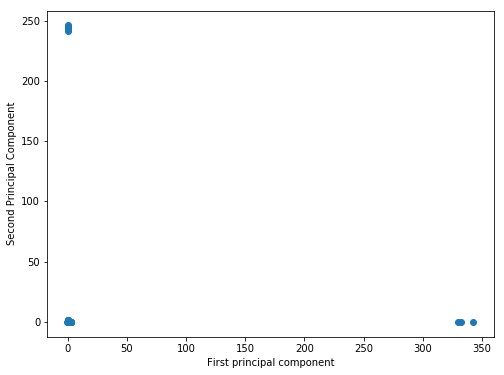

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(Xpca[:,0],Xpca[:,1],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [14]:
clf.components_

array([[ 1.85123433e-05,  3.05544757e-08,  8.11175406e-06, ...,
         1.31998444e-07,  9.26179356e-09,  1.02659218e-07],
       [ 1.37488790e-06,  5.27894259e-09,  1.42428887e-06, ...,
         2.37932443e-08,  5.00837883e-08,  2.81988585e-07],
       [ 4.82270395e-03,  7.18906850e-07,  1.75012048e-03, ...,
         2.90649843e-06,  5.21089135e-07,  5.93131745e-06],
       ...,
       [-3.17099931e-04,  1.80365843e-06, -1.22443282e-04, ...,
        -8.76526087e-07, -3.74532917e-07, -2.99426376e-07],
       [ 1.30567555e-03,  1.72261360e-06, -1.13134834e-04, ...,
        -1.89521226e-05,  2.81092521e-07,  1.66933572e-05],
       [ 4.65783920e-05,  6.66130666e-06,  7.30153085e-05, ...,
         5.57410204e-06,  1.72778468e-06,  9.56232132e-06]])

In [15]:
df_comp = pd.DataFrame(clf.components_)

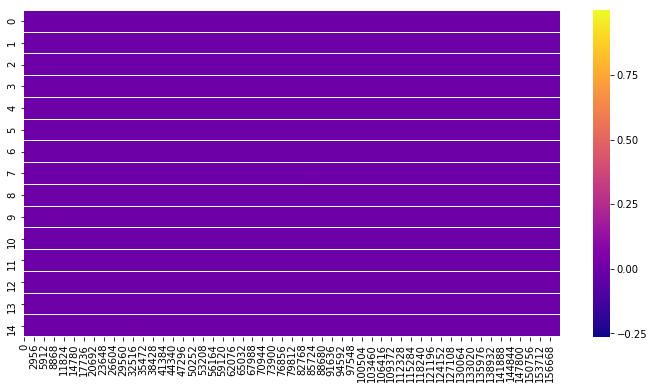

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

### MiniBatchSparsePCA

In [18]:
import numpy as np
from sklearn.decomposition import MiniBatchSparsePCA
# from sklearn.datasets import fetch_20newsgroups

In [19]:
# dataset_train = fetch_20newsgroups(subset='train')
# dataset_test = fetch_20newsgroups(subset='test')

In [20]:
# y_train = dataset_train['target']
# y_test = dataset_test['target']

In [55]:
# https://github.com/lambdaofgod/stackexchange/blob/master/stackoverflow/SPCA%20Word%20Clusters.ipynb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split 

df_pca = df[df['rating']>0]
X = df_pca['comment_text']
# y = df['toxic']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42, stratify=y)

vectorizer = TfidfVectorizer(min_df=5, token_pattern='[a-zA-Z]+', stop_words='english')

X_train = vectorizer.fit_transform(X)
# X_test = vectorizer.transform(X_test)

print('dictionary has ', len(vectorizer.vocabulary_), 'entries')

X_train_dense = X_train.toarray()

dictionary has  6673 entries


In [56]:
n_components = 6

spca = MiniBatchSparsePCA(n_components=n_components, alpha=0.04,
                          batch_size=3, n_iter=100, random_state=0)

%time X_train_reduced = spca.fit_transform(X_train_dense)

CPU times: user 17.7 s, sys: 2.41 s, total: 20.1 s
Wall time: 36.5 s


In [57]:
for i in range(n_components):
    print('component', i, 'has', sum(spca.components_[i, :] != 0), 'nonzero entries')

component 0 has 11 nonzero entries
component 1 has 35 nonzero entries
component 2 has 56 nonzero entries
component 3 has 146 nonzero entries
component 4 has 4 nonzero entries
component 5 has 248 nonzero entries


In [58]:
component_idxs = [np.where(spca.components_[i, :])[0] for i in range(n_components)]

In [59]:
idx_to_words = dict((n, word) for (word, n) in vectorizer.vocabulary_.items())

In [60]:
for i in range(n_components):
    print('Tokens for', i, 'component:')
    print([idx_to_words[i] for i in component_idxs[i]])
    print()

Tokens for 0 component:
['bag', 'boy', 'contribution', 'donkey', 'filthy', 'kuru', 'mom', 'n', 'ps', 'queer', 'ryan']

Tokens for 1 component:
['add', 'ask', 'assholes', 'bout', 'boy', 'buddy', 'clue', 'contribution', 'cunt', 'dog', 'donkey', 'dude', 'fuck', 'gay', 'hard', 'heard', 'ill', 'jew', 'job', 'kill', 'kuru', 'live', 'loser', 'mom', 'n', 'nerd', 'penis', 'remember', 'ryan', 'shithead', 'thanks', 'ufc', 'useless', 'wanker', 'whats']

Tokens for 2 component:
['aids', 'anal', 'animal', 'ass', 'ballz', 'benefits', 'big', 'check', 'cock', 'cocksucker', 'cocksucking', 'cretin', 'dan', 'despicable', 'dickhead', 'dong', 'douche', 'douchebag', 'film', 'filthy', 'freaking', 'friends', 'frodesiak', 'fucken', 'fucking', 'hey', 'hurry', 'ill', 'jews', 'loves', 'makes', 'nazis', 'ned', 'notable', 'pan', 'past', 'penis', 'pig', 'pigs', 'prick', 'raped', 'retard', 'sack', 'saying', 'shithole', 'stay', 'strongly', 'suck', 'sucker', 'sucking', 'sucks', 'suffering', 'swine', 'undoing', 'wat', 'w